In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
model=tf.keras.models.load_model('./models/object_detection01.h5')
print('model successfully loaded')

model successfully loaded


In [4]:
path='./test01/t5.jpeg'
image=load_img(path) #PIL object
image= np.array(image,dtype=np.uint8) #8 bit array
image1= load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  #convert to array and get normalized input

In [5]:
#print size of the original image
print(image.shape)
h,w,d = image.shape
print('Height of the image=',h)
print('Width of the image=',w)


(194, 259, 3)
Height of the image= 194
Width of the image= 259


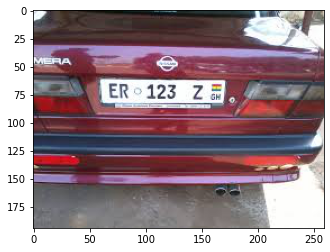

In [6]:
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
test_arr = tf.reshape(test_arr,[1,224,224,3])
test_arr.shape

TensorShape([1, 224, 224, 3])

In [10]:
#make predictions
corrds= model.predict(test_arr)
corrds

1/1 [==============================] - 43s 43s/step


array([[0.23963107, 0.23201238, 0.99995166, 0.4430255 ]], dtype=float32)

In [11]:
#denormalize the values
denorm = np.array([w,w,h,h])
newcorrds = corrds * denorm
newcorrds

array([[ 62.06444757,  60.09120543, 193.99062216,  85.94694692]])

In [12]:
newcorrds = newcorrds.astype(np.int32)
newcorrds

array([[ 62,  60, 193,  85]])

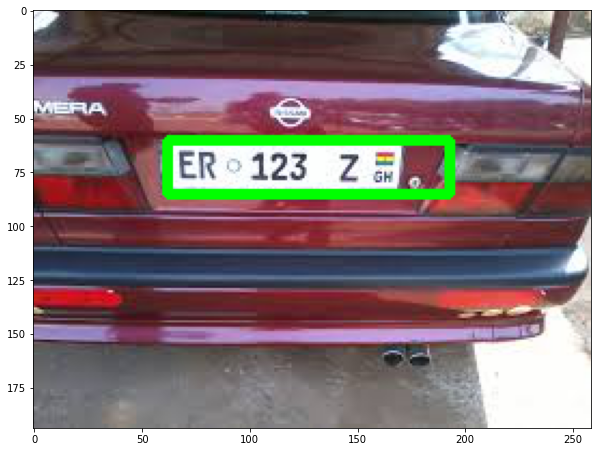

In [13]:
#draw bound
xmin,ymin,xmax,ymax=newcorrds[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
pt1,pt2
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [15]:
#pipeline
path='./test01/t5.jpeg'
def object_detection(path):
    #read image
    image=load_img(path) #PIL object
    image= np.array(image,dtype=np.uint8) #8 bit array
    image1= load_img(path,target_size=(224,224))
    image_arr_224 = img_to_array(image1)/255.0  #convert to array and get normalized input
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    #make predictions
    corrds= model.predict(test_arr)
    #denormalize the values
    denorm = np.array([w,w,h,h])
    newcorrds = corrds * denorm
    newcorrds = newcorrds.astype(np.int32)
    #draw bound
    xmin,ymin,xmax,ymax=newcorrds[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    pt1,pt2
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, newcorrds

1/1 [==============================] - 5s 5s/step


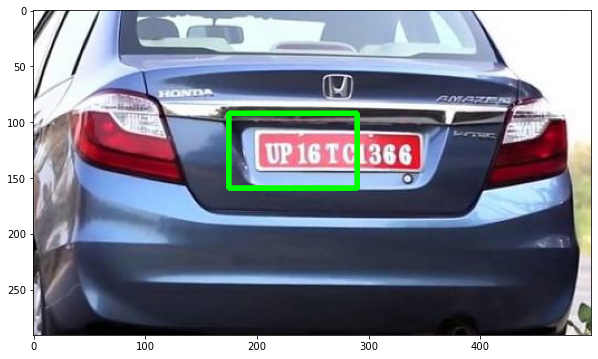

In [16]:
path='./test01/N131.jpeg'
image, cods=object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR


In [17]:
import pytesseract as pt

1/1 [==============================] - 5s 5s/step


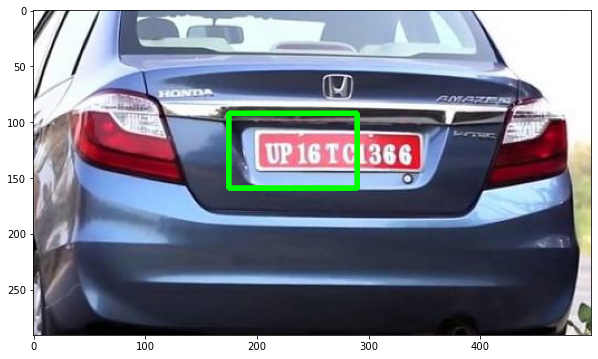

In [18]:
path='./test01/N131.jpeg'
image, cods=object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [19]:
cods

array([[175,  92, 290, 159]])

In [20]:
image = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = image[w-ymin:ymax,xmin:xmax+w]

In [ ]:
plt.imshow(roi)
plt.show()

In [22]:
#extract image
pt.image_to_string(roi)

ValueError: tile cannot extend outside image